# Retail Sales and Customer Shopping Trends

### Questions

* What is the impact of the correlation between discount and profit on category profitability?
* How does the average discount affect profits in different categories?
* How do profits differ across categories by month and season?

Before beginning we need to import libraries we will need

In [393]:
# Import the sqlite3 module to work with SQLite databases.
import sqlite3

# Import the pandas library for data manipulation and analysis.
import pandas as pd

# Import the os module to perform operating system related tasks.
import os

# Import the numpy library for numerical operations.
import numpy as np

# Import the matplotlib library for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

# Import the seaborn library for making statistical graphics, built on top of matplotlib.
import seaborn as sns

# Import datetime module to work with datetime-related functions.
from datetime import datetime

# Importing the time module to work with time-related functions like sleep and tracking time
import time

### Establish a connection to the SQLite database

In [394]:
# Function to establish connection to the database and execute SQL queries
def execute_queries():
# Paths to the CSV file and database
    csv_path = '../data/merged_data.csv'
        
# Load the CSV file into a Pandas DataFrame
    merged_df = pd.read_csv(csv_path, index_col=0)
    
# Connect to the SQLite database
    connect = sqlite3.connect('../data/retail_sales_and_trends.db')
    
# Write the DataFrame to the database
    merged_df.to_sql(name='merged_data', con=connect, if_exists='replace', index=False)
    
# Commit changes and close the connection
    connect.commit()
    connect.close()

# Retry mechanism for error handling 
max_retries = 5
retry_delay = 1  # in seconds

for attempt in range(1, max_retries + 1):
    try:
        execute_queries()
        print("SQL queries executed successfully.")
        break
    except sqlite3.DatabaseError as e:
        print(f"Attempt {attempt} failed:", e)
        if attempt < max_retries:
            print("Retrying after", retry_delay, "seconds...")
            time.sleep(retry_delay)
        else:
            print("Max retries exceeded. Unable to execute SQL queries.")

SQL queries executed successfully.


Check for the tables

In [395]:
# Query to check for tables
table_test_query = """
    SELECT name FROM sqlite_master 
    WHERE type='table';
    """
try:
    with sqlite3.connect('../data/retail_sales_and_trends.db') as connect:
        cur_table = connect.cursor()
        cur_table.execute(table_test_query)
        print("Available tables:", cur_table.fetchall())
except sqlite3.Error as e:
    print("SQLite error:", e)


Available tables: [('merged_data',)]


### Inspect the data

Take a look at the first five rows of the merged_df

In [396]:
# Connect to the SQLite database
conn = sqlite3.connect('../data/retail_sales_and_trends.db')
cursor = conn.cursor()  # Create a cursor object

# Query to get the first 10 rows
first_10_query = "SELECT * FROM merged_data LIMIT 10;"
first_10 = pd.read_sql_query(first_10_query, conn)

# Display the results
print("First 10 Rows:")
print(first_10.to_string(index=False)) 

# Commit changes and close the connection
connect.commit()
connect.close()

First 10 Rows:
 Customer ID  Age Gender  Product    Category      Location Season  Review Rating  Subscription Status  Discount Applied  Promo Code Used  Previous Purchases Frequency of Purchases       Date  Quantity  Purchase Amount (USD)  Sales      Holiday  Year  Month  Day   Age Group Previous Purchases Group
           1   55   Male   Blouse    Clothing      Kentucky Winter            3.1                    1                 1                1                  14            Fortnightly 2023-11-24         3                     53  159.0 Black Friday  2023     11   24      Senior                    11-20
           2   19   Male  Sweater    Clothing         Maine Winter            3.1                    1                 1                1                   2            Fortnightly 2023-02-27         2                     64  128.0   No Holiday  2023      2   27 Young Adult                     0-10
           3   50   Male    Jeans    Clothing Massachusetts Spring            3.1    

Take a look at the last five rows of the merged_df

In [397]:
# Connect to the SQLite database
connect = sqlite3.connect('../data/retail_sales_and_trends.db')
cursor = conn.cursor()  # Create a cursor object

# Query to get the last 10 rows
last_10_query = "SELECT * FROM merged_data ORDER BY ROWID DESC LIMIT 10;"
last_10 = pd.read_sql_query(last_10_query, conn)

# Commit changes and close the connection
connect.commit()
connect.close()

print("\nLast 10 Rows:")
print(last_10.to_string(index=False)) 



Last 10 Rows:
 Customer ID  Age Gender  Product    Category      Location Season  Review Rating  Subscription Status  Discount Applied  Promo Code Used  Previous Purchases Frequency of Purchases       Date  Quantity  Purchase Amount (USD)  Sales    Holiday  Year  Month  Day   Age Group Previous Purchases Group
        3900   52 Female  Handbag Accessories    California Spring            3.1                    0                 0                0                  33              Quarterly 2024-01-01         3                     81  128.0 No Holiday  2024      1    1      Senior                    31-40
        3899   44 Female    Shoes    Footwear     Minnesota Summer            3.8                    0                 0                0                  24                 Weekly 2024-01-01         3                     77  128.0 No Holiday  2024      1    1       Adult                    21-30
        3898   46 Female     Belt Accessories    New Jersey Spring            2.9          

Take a look at the structure of the table

In [398]:
# Connect to the SQLite database
connect = sqlite3.connect('../data/retail_sales_and_trends.db')
cursor = conn.cursor()  # Create a cursor object

# Execute a query to get table structure and information (schema)
cursor.execute("PRAGMA table_info(merged_data);")

# Fetch and display the result
table_info = cursor.fetchall()
for column in table_info:
    print(column)

# Commit changes and close the connection
connect.commit()
connect.close()

(0, 'Customer ID', 'INTEGER', 0, None, 0)
(1, 'Age', 'INTEGER', 0, None, 0)
(2, 'Gender', 'TEXT', 0, None, 0)
(3, 'Product', 'TEXT', 0, None, 0)
(4, 'Category', 'TEXT', 0, None, 0)
(5, 'Location', 'TEXT', 0, None, 0)
(6, 'Season', 'TEXT', 0, None, 0)
(7, 'Review Rating', 'REAL', 0, None, 0)
(8, 'Subscription Status', 'INTEGER', 0, None, 0)
(9, 'Discount Applied', 'INTEGER', 0, None, 0)
(10, 'Promo Code Used', 'INTEGER', 0, None, 0)
(11, 'Previous Purchases', 'INTEGER', 0, None, 0)
(12, 'Frequency of Purchases', 'TEXT', 0, None, 0)
(13, 'Date', 'TEXT', 0, None, 0)
(14, 'Quantity', 'INTEGER', 0, None, 0)
(15, 'Purchase Amount (USD)', 'INTEGER', 0, None, 0)
(16, 'Sales', 'REAL', 0, None, 0)
(17, 'Holiday', 'TEXT', 0, None, 0)
(18, 'Year', 'INTEGER', 0, None, 0)
(19, 'Month', 'INTEGER', 0, None, 0)
(20, 'Day', 'INTEGER', 0, None, 0)
(21, 'Age Group', 'TEXT', 0, None, 0)
(22, 'Previous Purchases Group', 'TEXT', 0, None, 0)


Discover the number of the table rows

In [399]:
# Connect to the SQLite database
connect = sqlite3.connect('../data/retail_sales_and_trends.db')
cursor = conn.cursor()  # Create a cursor object

# Execute the query to count the rows in the 'merged_data' table
cursor.execute("SELECT COUNT(*) FROM merged_data;")

# Fetch the result
row_count = cursor.fetchone()[0]

# Display the result
print(f"Total number of rows in merged_data: {row_count}")

# Commit changes and close the connection
connect.commit()
connect.close()

Total number of rows in merged_data: 3900


Ensure that the table has no null values

In [400]:
# Connect to the SQLite database
connect = sqlite3.connect('../data/retail_sales_and_trends.db')
cursor = conn.cursor()

# Fetch all column names from the table
table_name = "merged_data"
cursor.execute(f"PRAGMA table_info({table_name});")
columns = [row[1] for row in cursor.fetchall()]  # Column names are in the second position

# Check for NULL values in each column
null_counts = {}
for column in columns:
    cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE \"{column}\" IS NULL;")
    count = cursor.fetchone()[0]
    null_counts[column] = count

# Commit changes and close the connection
connect.commit()
connect.close()

# Display the results
print("NULL value counts for each column:")
for column, count in null_counts.items():
    if count > 0:
        print(f"  {column}: {count} NULL values")
    else:
        print(f"  {column}: No NULL values")

NULL value counts for each column:
  Customer ID: No NULL values
  Age: No NULL values
  Gender: No NULL values
  Product: No NULL values
  Category: No NULL values
  Location: No NULL values
  Season: No NULL values
  Review Rating: No NULL values
  Subscription Status: No NULL values
  Discount Applied: No NULL values
  Promo Code Used: No NULL values
  Previous Purchases: No NULL values
  Frequency of Purchases: No NULL values
  Date: No NULL values
  Quantity: No NULL values
  Purchase Amount (USD): No NULL values
  Sales: No NULL values
  Holiday: No NULL values
  Year: No NULL values
  Month: No NULL values
  Day: No NULL values
  Age Group: No NULL values
  Previous Purchases Group: No NULL values


### Data preparation for analysis

In my analysis, I will focus on a complementary aspect of the analysis. Since the dataset lacks original prices, discounts, and profit information, I will add new columns based on the existing data, considering when discounts were applied and promo codes were used. Additionally, I will use typical industry percentage estimates to calculate these values. This approach will help establish a balanced relationship between discounts and profits across categories and other data patterns

In [401]:
# Connect to the SQLite database
with sqlite3.connect('../data/retail_sales_and_trends.db') as connect:
    cursor = connect.cursor()

    # Fetch all existing columns in the table
    cursor.execute("PRAGMA table_info(merged_data);")
    columns = [row[1] for row in cursor.fetchall()]  # Extract column names

    # Add 'Original_Price_per_Item' column if it doesn't exist
    if "Original_Price_per_Item" not in columns:
        cursor.execute("PRAGMA foreign_keys=OFF;")
        cursor.execute("""
        ALTER TABLE merged_data
        ADD COLUMN Original_Price_per_Item REAL;
        """)
        cursor.execute("PRAGMA foreign_keys=ON;")
        print("Column 'Original_Price_per_Item' added successfully.")
    else:
        print("Column 'Original_Price_per_Item' already exists.")

    # Add 'Discount' column if it doesn't exist
    if "Discount" not in columns:
        cursor.execute("PRAGMA foreign_keys=OFF;")
        cursor.execute("""
        ALTER TABLE merged_data
        ADD COLUMN Discount REAL;
        """)
        cursor.execute("PRAGMA foreign_keys=ON;")
        print("Column 'Discount' added successfully.")
    else:
        print("Column 'Discount' already exists.")

    # Set assumed discount percentages for categories
    cursor.execute("""
    UPDATE merged_data
    SET Discount = 
        CASE 
            WHEN Category = 'Accessories' THEN 0.08  -- 8% for Accessories
            WHEN Category = 'Footwear' THEN 0.15  -- 15% for Footwear
            WHEN Category = 'Clothing' THEN 0.20  -- 20% for Clothing
            WHEN Category = 'Outerwear' THEN 0.12  -- 12% for Outerwear       
            ELSE 0.05  -- Default 5% discount for other categories
        END;
    """)

    # Calculate original price per item
    cursor.execute("""
    UPDATE merged_data
    SET Original_Price_per_Item = 
        CASE 
            WHEN "Discount Applied" = '1' THEN ROUND(Sales / Quantity / (1 - Discount), 2)  -- Original_Price_per_Item when discount is applied
            ELSE ROUND(Sales / Quantity, 2)  -- Original_Price_per_Item if no discount applied
        END;
    """)
    
    # Check if the 'Profit' column exists
    cursor.execute("PRAGMA table_info(merged_data);")
    columns = [column[1] for column in cursor.fetchall()]  # Get column names

    # Add 'Profit' column if it doesn't exist
    if 'Profit' not in columns:
        cursor.execute("""
            ALTER TABLE merged_data
            ADD COLUMN Profit REAL;
        """)
        print("Profit column added.")
    else:
        print("Profit column already exists.")


    # Update the profit column with profit margin calculations based on discount and category
    cursor.execute("""
    UPDATE merged_data
    SET Profit = 
        CASE 
            WHEN Category = 'Accessories' THEN ROUND((Sales - (Sales * 0.08)) * 0.25, 2)  -- 25% profit margin for Accessories, 8% discount
            WHEN Category = 'Footwear' THEN ROUND((Sales - (Sales * 0.15)) * 0.40, 2)  -- 40% profit margin for Footwear, 15% discount
            WHEN Category = 'Clothing' THEN ROUND((Sales - (Sales * 0.20)) * 0.50, 2)  -- 50% profit margin for Clothing, 20% discount
            WHEN Category = 'Outerwear' THEN ROUND((Sales - (Sales * 0.12)) * 0.30, 2)  -- 30% profit margin for Outerwear, 12% discount
            ELSE ROUND((Sales - (Sales * 0.10)) * 0.30, 2)  -- Default 30% profit margin for other categories, 10% discount
        END;
    """)

    # Commit the changes
    connect.commit()

    print("Columns 'Original_Price_per_Item', 'Discount', and 'Profit' have been updated successfully.")


Column 'Original_Price_per_Item' added successfully.
Column 'Discount' added successfully.
Profit column added.
Columns 'Original_Price_per_Item', 'Discount', and 'Profit' have been updated successfully.


Display the first five rows to check the columns added and calculated

In [402]:
# Connect to the database
with sqlite3.connect('../data/retail_sales_and_trends.db') as connect:
# Query to fetch all rows from the merged_data table
 query = "SELECT * FROM merged_data;"
    
# Use Pandas to execute the query and load the results into a DataFrame
result_df = pd.read_sql_query(query, connect)
# Reset the index 
result_df.reset_index(drop=True, inplace=True)    

# Display the first 5 rows with column names
result_df.head(5)

,Customer ID,Age,Gender,Product,Category,Location,Season,Review Rating,Subscription Status,Discount Applied,...,Sales,Holiday,Year,Month,Day,Age Group,Previous Purchases Group,Original_Price_per_Item,Discount,Profit
0,1,55,Male,Blouse,Clothing,Kentucky,Winter,3.1,1,1,...,159.0,Black Friday,2023,11,24,Senior,11-20,66.25,0.20,63.6
1,2,19,Male,Sweater,Clothing,Maine,Winter,3.1,1,1,...,128.0,No Holiday,2023,2,27,Young Adult,0-10,80.00,0.20,51.2
2,3,50,Male,Jeans,Clothing,Massachusetts,Spring,3.1,1,1,...,73.0,No Holiday,2023,1,13,Adult,21-30,91.25,0.20,29.2
3,4,21,Male,Sandals,Footwear,Rhode Island,Spring,3.5,1,1,...,90.0,No Holiday,2023,5,21,Young Adult,41-50,105.88,0.15,30.6
4,5,45,Male,Blouse,Clothing,Oregon,Spring,2.7,1,1,...,98.0,No Holiday,2023,5,6,Adult,31-40,61.25,0.20,39.2


Retrieve columns names of the table

In [403]:
# Connect to the SQLite database
connect = sqlite3.connect('../data/retail_sales_and_trends.db')
cursor = connect.cursor()

# Execute the PRAGMA statement to get column information
cursor.execute("PRAGMA table_info(merged_data);")
    
# Fetch all column details
columns_info = cursor.fetchall()

# Commit changes and close the connection
connect.commit()
connect.close()

# Extract and print column names
column_names = [column[1] for column in columns_info]
print(column_names)

['Customer ID', 'Age', 'Gender', 'Product', 'Category', 'Location', 'Season', 'Review Rating', 'Subscription Status', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Frequency of Purchases', 'Date', 'Quantity', 'Purchase Amount (USD)', 'Sales', 'Holiday', 'Year', 'Month', 'Day', 'Age Group', 'Previous Purchases Group', 'Original_Price_per_Item', 'Discount', 'Profit']


Retrieve 'Discount', Original_Price_per_Item and 'Profit' columns

In [404]:
# Connect to the SQLite database
with sqlite3.connect('../data/retail_sales_and_trends.db') as connect:
   cursor = connect.cursor()

# SQL query to select only 'Profit' and 'Discount' columns
   query = "SELECT Discount, Profit, Original_Price_per_Item FROM merged_data;"

# Execute the query and load the data into a Pandas DataFrame
df = pd.read_sql_query(query, connect)

# Commit changes and close the connection
connect.commit()
connect.close()

# Display the DataFrame
df.head()

,Discount,Profit,Original_Price_per_Item
0,0.20,63.6,66.25
1,0.20,51.2,80.00
2,0.20,29.2,91.25
3,0.15,30.6,105.88
4,0.20,39.2,61.25


Data Extraction and Summary Statistics

In [405]:
# Connect to the SQLite database
connect = sqlite3.connect('../data/retail_sales_and_trends.db')
cursor = connect.cursor()

# SQL query
query = """
SELECT Profit, Discount
FROM merged_data;
"""

# Execute query and load results into DataFrame
merged_df = pd.read_sql_query(query, connect)

# Commit changes and close the connection
connect.commit()
connect.close()

# Print summary statistics for the selected columns
merged_df[['Discount', 'Profit']].describe()


,Discount,Profit
count,3900.000000,3900.000000
mean,0.147521,43.610113
std,0.052352,19.316061
min,0.080000,4.830000
25%,0.080000,29.440000
50%,0.150000,43.520000
75%,0.200000,51.200000
max,0.200000,160.000000


### Exploratory Data Analysis (EDA)

Analyze the correlation between the Profit and Discount

   Discount  Profit
0      0.20    63.6
1      0.20    51.2
2      0.20    29.2
3      0.15    30.6
4      0.20    39.2
Correlation between Discount and Profit: 
          Discount   Profit
Discount   1.00000  0.54295
Profit     0.54295  1.00000


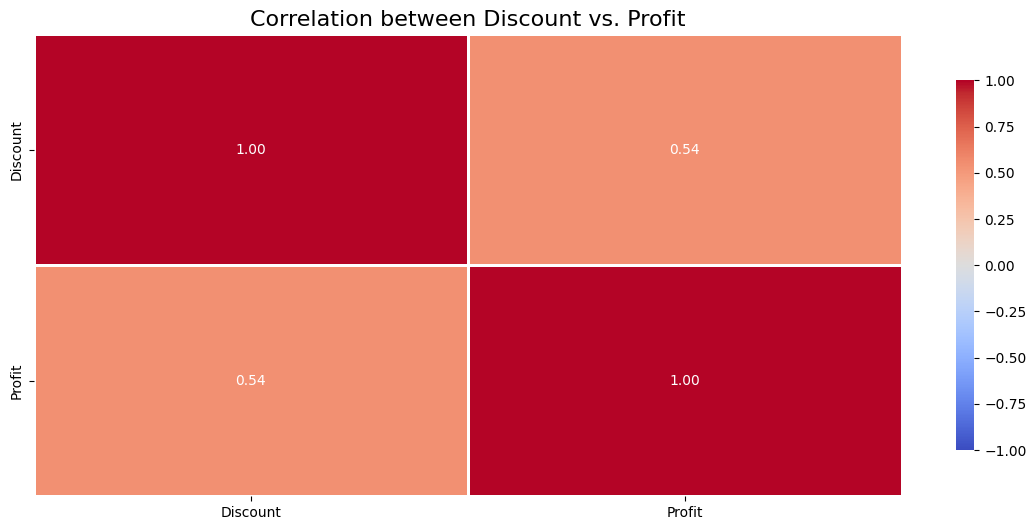

In [406]:
# Connect to the SQLite database
connect = sqlite3.connect('../data/retail_sales_and_trends.db')
cursor = connect.cursor()

# SQL query to fetch Discount and Profit columns
query = """
SELECT 
    Discount,
    Profit
FROM merged_data
"""

# Execute the query and load the results into a DataFrame
try:
    discount_analysis = pd.read_sql_query(query, connect)
    print(discount_analysis.head())  # Print the first few rows for verification
finally:
    # Close the connection
    connect.close()

# Calculate the correlation between Discount and Profit
correlation = discount_analysis[['Discount', 'Profit']].corr()
print(f"Correlation between Discount and Profit: \n{correlation}")

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(14, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation between Discount vs. Profit', fontsize=16)
plt.show()


### Notes on Findings
* The correlation between discount and profit is positive, with a value of 0.54, indicating a moderate positive relationship. This suggests that as the discount increases, profit tends to increase as well, though the correlation is not strong enough to suggest a perfect relationship. The data shows that higher discounts generally align with higher profits, but other factors may also influence profit levels.

Analyze the average profit and discount by category

      Category  Avg_Discount  Avg_Profit
0  Accessories          0.08   30.296935
1     Clothing          0.20   54.007139
2     Footwear          0.15   45.593489
3    Outerwear          0.12   35.155370


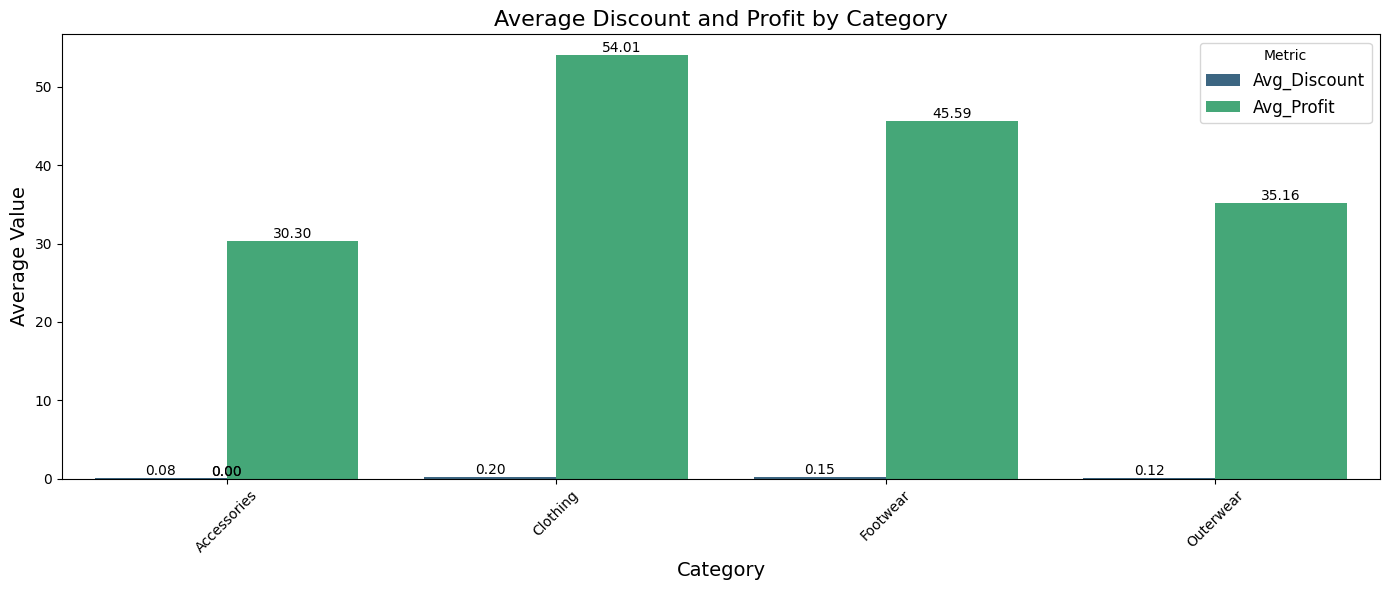

In [407]:
# Connect to the SQLite database
connect = sqlite3.connect('../data/retail_sales_and_trends.db')

# SQL query for analysis of average Discount and Profit by Category
query = """
SELECT 
    Category,
    AVG(Discount) AS Avg_Discount,
    AVG(Profit) AS Avg_Profit
FROM merged_data
GROUP BY Category
ORDER BY Category;
"""

# Execute the query and load the results into a DataFrame
try:
    discount_profit_analysis = pd.read_sql_query(query, connect)
    print(discount_profit_analysis)
except Exception as e:
    print(f"Error: {e}")
finally:
    # Close the connection
    connect.close()

# Using Seaborn bar plot to visualize the result
plt.figure(figsize=(14, 6))

# Melt the DataFrame for easier plotting with Seaborn
melted_data = discount_profit_analysis.melt(id_vars="Category", var_name="Metric", value_name="Value")

# Create a grouped bar chart
ax = sns.barplot(data=melted_data, x="Category", y="Value", hue="Metric", palette="viridis")

# Add titles and labels
plt.title('Average Discount and Profit by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend(title="Metric", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add data labels above bars
for p in ax.patches:
    height = p.get_height()
# Add label to each bar with value formatted as a float
    ax.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Notes on Findings
* The analysis of average discount and profit across categories reveals that Clothing offers the highest average profit at 54.01, followed by Footwear at 45.59. Accessories have the lowest average profit at 30.30, despite having the smallest average discount of 0.08. Outerwear shows a moderate average profit of 35.16 with a discount of 0.12. This indicates that higher discounts, as seen in Clothing and Footwear, are associated with higher average profits, though the relationship between discount and profit may vary across different categories.

Analyze Profit per Category by Month (2023)

      Month     Category  Avg_Profit
0   2023-01  Accessories   29.561308
1   2023-01     Clothing   51.663393
2   2023-01     Footwear   43.565079
3   2023-01    Outerwear   33.929129
4   2023-02  Accessories   30.976071
5   2023-02     Clothing   64.491429
6   2023-02     Footwear   40.290000
7   2023-02    Outerwear   33.857500
8   2023-03  Accessories   35.606190
9   2023-03     Clothing   75.223529
10  2023-03     Footwear   63.553846
11  2023-03    Outerwear   22.918000
12  2023-04  Accessories   32.966667
13  2023-04     Clothing   59.200000
14  2023-04     Footwear   54.847368
15  2023-04    Outerwear   40.358750
16  2023-05  Accessories   22.770000
17  2023-05     Clothing   64.263415
18  2023-05     Footwear   47.762609
19  2023-05    Outerwear   29.982857
20  2023-06  Accessories   30.350417
21  2023-06     Clothing   66.160000
22  2023-06     Footwear   41.933333
23  2023-06    Outerwear   46.035000
24  2023-07  Accessories   31.816667
25  2023-07     Clothing   55.646154
2

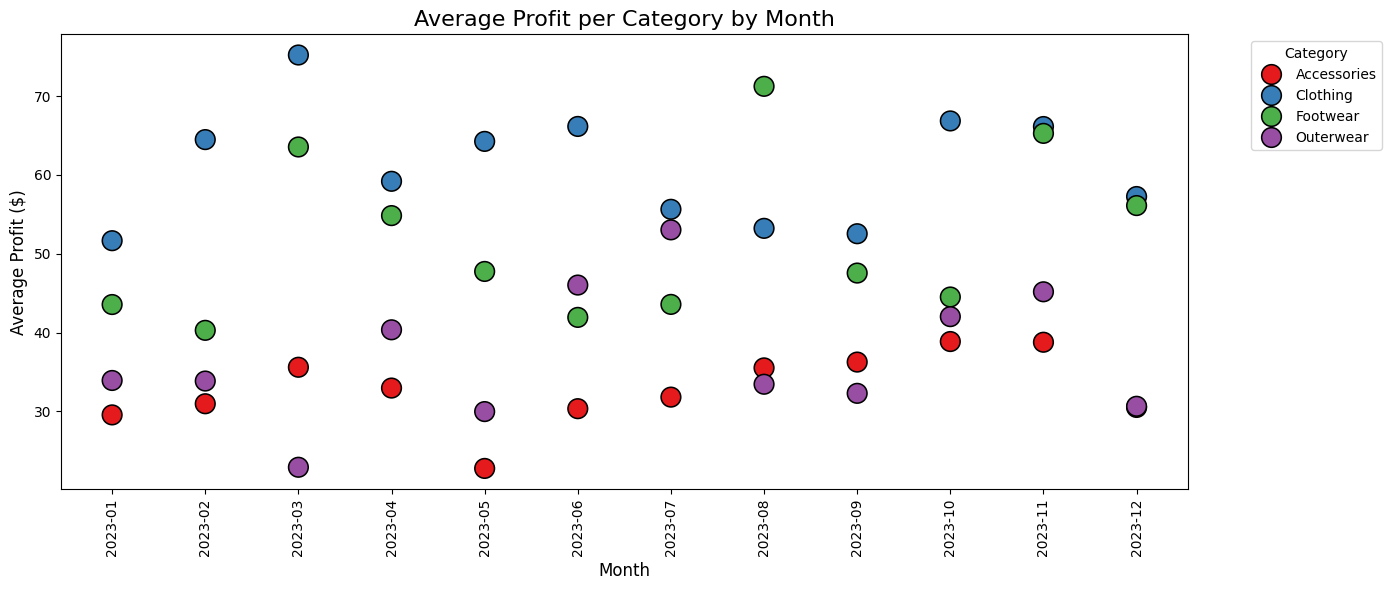

In [408]:
# Connect to the SQLite database
connect = sqlite3.connect('../data/retail_sales_and_trends.db')

# SQL query for Average Profit by Month and Category
query = """
SELECT 
    strftime('%Y-%m', Date) AS Month,
    Category,
    AVG(Profit) AS Avg_Profit
FROM merged_data
GROUP BY Month, Category
ORDER BY Month, Category;
"""

# Execute the query and load the results into a DataFrame
try:
    avg_profit_by_month = pd.read_sql_query(query, connect)
    print(avg_profit_by_month)  # Display the results
except Exception as e:
    print(f"Error: {e}")
finally:
    # Close the connection
    connect.close()

# Scatter Plot for Average Profit by Month and Category
plt.figure(figsize=(14, 6))

# Create the scatter plot
sns.scatterplot(
    data=avg_profit_by_month, 
    x='Month', 
    y='Avg_Profit', 
    hue='Category', 
    palette='Set1', 
    s=200,  # Marker size
    edgecolor='black'  # Black edge around markers
)

# Add Titles and Labels
plt.title('Average Profit per Category by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Profit ($)', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Customize the legend
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Notes on Findings
* The analysis shows that Clothing consistently has the highest average profit, peaking in March at 75.22. Footwear also sees a spike in March but declines afterward. Accessories and Outerwear maintain stable, lower profits, with Accessories showing gradual growth. These trends indicate that Clothing and Footwear have seasonal demand spikes, particularly in spring, while Accessories and Outerwear have more consistent, lower profits.

Analyze the Average Profit by Season

   Season  Avg_Profit
0    Fall   43.501754
1  Spring   43.380040
2  Summer   43.214147
3  Winter   44.345067


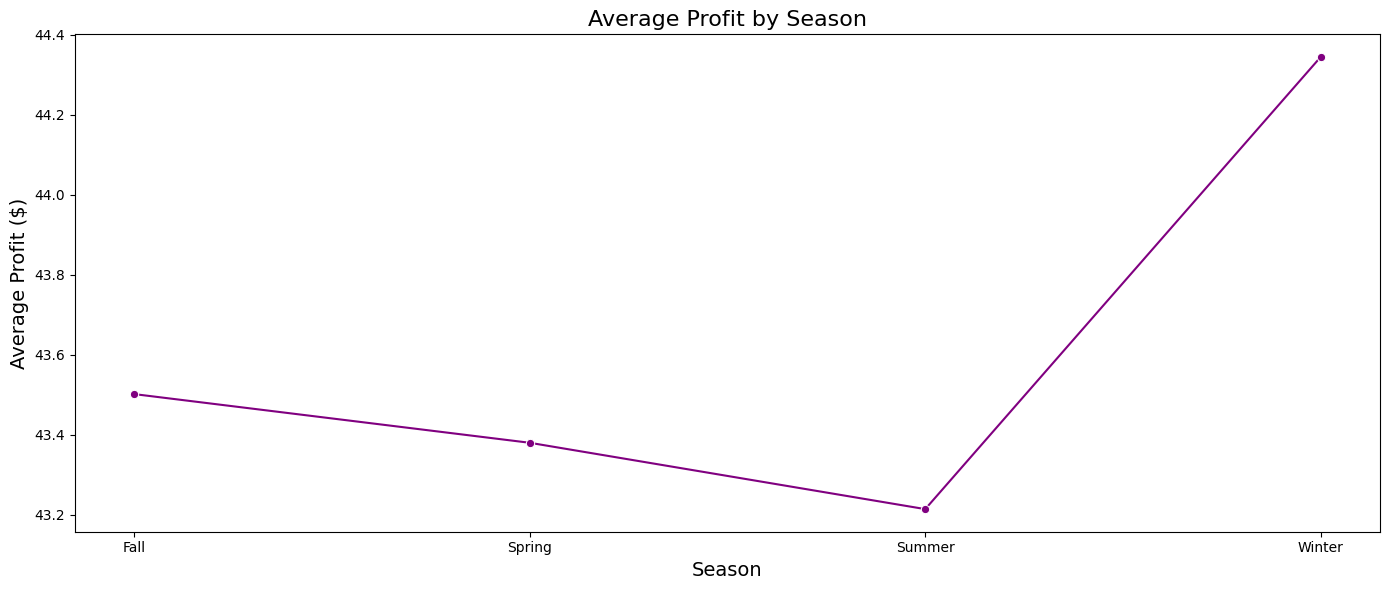

In [409]:
# Connect to the SQLite database
connect = sqlite3.connect('../data/retail_sales_and_trends.db')

# SQL query to calculate average profit by season
query = """
SELECT 
    Season, 
    AVG(Profit) AS Avg_Profit
FROM merged_data
GROUP BY Season
ORDER BY Season;
"""

# Execute the query and load the results into a DataFrame
try:
    profit_by_season = pd.read_sql_query(query, connect)
    print(profit_by_season)
except Exception as e:
    print(f"Error: {e}")
finally:
    # Close the connection
    connect.close()

# Create a line plot using Seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=profit_by_season, x='Season', y='Avg_Profit', marker='o', color='purple')

# Add title and labels
plt.title('Average Profit by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Profit ($)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()  


### Notes on Findings
* The line plot shows the average profit for each season. Winter has the highest average profit at 44.34, followed by Fall with an average profit of 43.50. Summer and Spring have similar average profits, with Summer at 43.21 and Spring at 43.38. This indicates that profit tends to be slightly higher in the winter season compared to others, with a relatively stable performance across other seasons.

### Recommendations 

* Optimize Profit with Strategic Discounting: Leverage strategic discounting, as higher discounts tend to correlate with increased profits. However, since the correlation is moderate, consider other factors like demand, seasonality, and customer behavior to optimize profit.
* Target Discount Strategies for High-Performing Categories: Focus on offering competitive discounts in categories like Clothing and Footwear, which show a higher correlation between discounts and profits. For Accessories, explore alternative strategies to boost profits, as the lower discount does not significantly drive higher profits in this category.
* Capitalize on Seasonal Spikes in Clothing and Footwear: Leverage the seasonal spikes in Clothing and Footwear, especially in spring, with targeted promotions. For Accessories and Outerwear, consider strategies to maintain consistent sales throughout the year, focusing on steady growth rather than seasonal fluctuations.
* Maximize Winter Profits and Ensure Year-Round Stability: Focus on maximizing profit during the winter season by increasing promotions or inventory for high-demand products. For other seasons, maintain stable marketing efforts to ensure consistent sales performance across Spring, Summer, and Fall.